# Статистический анализ данных. Сборный проект 1

Интернет-магазин "Стримчик" продает по всему миру компьютерные игры. Есть данные до 2016 года о продажах игр, оценки пользователей, экспертов, жанры и платформы. Данные за 2016 год могут быть неполными.
Необходимо проанализировать данные открытых источников, выявить определяющие успешность игры закономерности, чтобы продавать прибыльные платформы и спланировать рекламу. Проверить некоторые гипотезы, которые могут помочь в продажах.
Нам необходимо будет:
+ загрузить и познакомиться с исходными данными;
+ сделать предобработку данных, привести к типу, удобному для дальнейшего анализа, проверить наличие пропущенных значений и дубликатов, создать столбец с сумарными продажами;
+ провести исследовательский анализ, посмотреть продажи по всем годам, выбрать актуальный период, который поможет сделать прогноз на 2017 год;
+ рассмотреть все платформы, их продажи, жанры, влияние отзывов на продажи за актуальный период;
+ составить портрет пользователя по регионам (NA, EU, JP), узнать самые популярные платформы, жанры;
+ проверить гипотезы, с помощью которых понять предпочтения и вкусы пользователей.

## 1. Изучение общей информации

**1.1. Импортируем библиотеки. Считаем данные из csv-файла и сохраним в переменную.**

In [1]:
import pandas as pd
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('C:/Users/Home/games.csv', sep=',')

In [3]:
warnings.filterwarnings('ignore')

**1.2. Выведем основную информацию и первые строки файла.**

In [4]:
#основная информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<span style="color:purple">**Вывод:**</span>
в файле `games.csv` 16715 строки и 11 параметров. Название столбцов необходимо привести к нижнему регистру, изменить тип данных в `Year_of_Release` - `int`, `User_Score` - `float`. В файле есть пропуски в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

## 2. Предобработка данных

**2.1. Приведем названия столбцов к нижнему регистру.**

In [6]:
df.columns = df.columns.str.lower()

In [7]:
#проверим
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

**2.2. Обработаем пропуски.**

**2.2.1. Посмотрим на пропуски.**

In [8]:
#посмотрим сколько пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#визуализируем пропуски
#msno.matrix(df, labels=True);

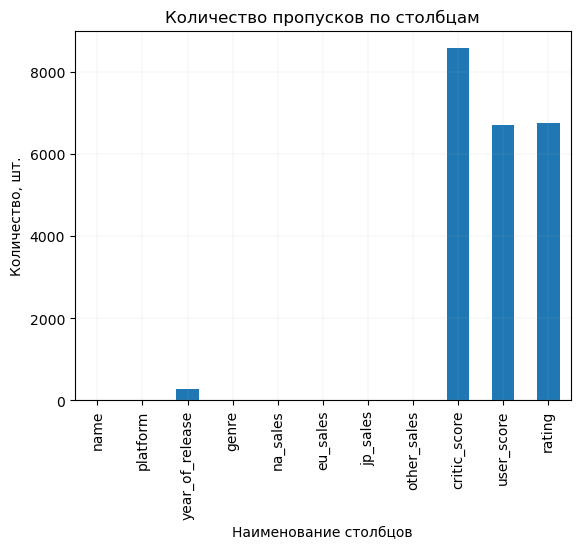

In [10]:
df.isnull().sum().plot(kind='bar')
plt.title('Количество пропусков по столбцам')
plt.grid(True, linewidth=0.1)
plt.xlabel('Наименование столбцов')
plt.ylabel('Количество, шт.');

*На диаграмме хорошо видно, что больше всего пропусков в столбцах `critic_score`, `user_score` и `rating`. Пропуски могли появится из-за выгрузки данных из разных источников, например, рейтинга в одном источнике могло просто не быть.*

**2.2.2. Столбец `name` - название игры.**

In [11]:
#посмотрим строки, где есть пропуски
df.loc[df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [12]:
#посмотрим какой процент от общего числа
(df['name'].isnull().sum() / len(df['name'])*100).round(2)

0.01

0.01% это мало, поэтому удалим эти строки.

In [13]:
#т.к. процент очень мал, то удалим строки
df = df.dropna(subset=['name'])

In [14]:
#проверим
df['name'].isna().sum()

0

**2.2.3. Столбец `year_of_release` - год выпуска**

In [15]:
#выведем процент пропусков
(df['year_of_release'].isnull().sum() / len(df['name'])*100).round(2)

1.61

1.61% это мало, поэтому удалим эти строки.

In [16]:
df = df.dropna(subset=['year_of_release'])

In [17]:
#посмотрим, что получилось
df['year_of_release'].isna().sum()

0

**2.2.4. Столбец `critic_score` - оценка критиков**

In [18]:
#выведем процент пропусков
(df['critic_score'].isnull().sum() / len(df['name'])*100).round(2)

51.45

51.45% это много, поэтому заменим пропуски значением отличным от всех в этом столбце, например -1.

In [19]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [20]:
df['critic_score'].isna().sum()

0

**2.2.5. Столбец `user_score` - оценка пользователей**

In [21]:
(df['user_score'].isnull().sum() / len(df['name'])*100).round(2)

40.17

40.17% это много, поэтому заменим пропуски значением отличным от всех в этом столбце, например -1.

In [22]:
df['user_score'] = df['user_score'].fillna(-1)

In [23]:
df['user_score'].isna().sum()

0

В столбце есть аббревиатура 'tbd'. В задании не описано, что она означает. Обычно аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined"

In [24]:
#посмотрим на строки с аббревиатурой 'tbd'
df[df['user_score'] == 'tbd']

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii           2010.0      Sports   
301    Namco Museum: 50th Anniversary      PS2           2005.0        Misc   
520                   Zumba Fitness 2      Wii           2011.0      Sports   
645                      uDraw Studio      Wii           2010.0        Misc   
718                   Just Dance Kids      Wii           2010.0        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA           2001.0      Action   
16697                Bust-A-Move 3000       GC           2003.0      Puzzle   
16698                Mega Brain Boost       DS           2008.0      Puzzle   
16704                        Plushees       DS           2008.0  Simulation   
16706   Men in Black II: Alien Escape       GC           2003.0     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66          -1.0        tbd   
301        2.08      1.35       0.0         0.54          61.0        tbd   
520        1.51      1.03       0.0         0.27          -1.0        tbd   
645        1.65      0.57       0.0         0.20          71.0        tbd   
718        1.52      0.54       0.0         0.18          -1.0        tbd   
...         ...       ...       ...          ...           ...        ...   
16695      0.01      0.00       0.0         0.00          67.0        tbd   
16697      0.01      0.00       0.0         0.00          53.0        tbd   
16698      0.01      0.00       0.0         0.00          48.0        tbd   
16704      0.01      0.00       0.0         0.00          -1.0        tbd   
16706      0.01      0.00       0.0         0.00          -1.0        tbd   

      rating  
119        E  
301     E10+  
520        T  
645        E  
718        E  
...      ...  
16695      E  
16697      E  
16698      E  
16704      E  
16706      T  

[2376 rows x 11 columns]

In [25]:
len(df[df['user_score'] == 'tbd']) / len(df['name'])*100

14.449039163220629

14.45% это много, поэтому заменим пропуски, чтобы их выделить значением -2.

In [26]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -2

In [27]:
#проверим
len(df[df['user_score'] == 'tbd'])

0

**2.2.6. Столбец `rating` - рейтинг от организации ESRB**

In [28]:
(df['rating'].isnull().sum() / len(df['name'])*100).round(2)

40.6

40.6% это много, т.к. тип столбца 'object', поэтому заменим пропуски значением "Unknown".

In [29]:
df['rating'] = df['rating'].fillna("Unknown")

In [30]:
df['rating'].isna().sum()

0

In [31]:
#посмотрим, что получили после обработки всех пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**2.3. Преобразуем данные в нужные типы, в соответствии со значениями в столбцах.**

In [32]:
df['year_of_release'] = (df['year_of_release']).astype('int')

In [33]:
df['critic_score'] = (df['critic_score']).astype('int')

In [34]:
df['user_score'] = (df['user_score']).astype('float')

**2.4. Посмотрим явные и неявные дубликаты.**

In [35]:
#посмотрим, есть ли явные дубликаты
df.duplicated().sum()

0

In [36]:
#посмотрим, есть ли неявные дубликаты
df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])]

name platform  year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3             2012  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
16230       0.0          0.0            83         5.5      E

In [37]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release', 'genre'])

In [38]:
#посмотрим, как отработала функция
df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [39]:
#выведем общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


**2.5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [40]:
df['total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [41]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  total  
0     28.96      3.77         8.45            76         8.0        E  82.54  
1      3.58      6.81         0.77            -1        -1.0  Unknown  40.24  
2     12.76      3.79         3.29            82         8.3        E  35.52  
3     10.93      3.28         2.95            80         8.0        E  32.77  
4      8.89     10.22         1.00            -1        -1.0  Unknown  31.38

<span style="color:purple">**Вывод:**</span>
выполнили предобработку данных:
1. Названия столбцов привели к нижнему регистру;
2. Преобразовали данные, в соответствии со значениями в столбцах, к нужным типам. `year_of_release`-'int', `critic_score`-'int', `user_score`-'float'.
3. Удалили пропуски в столбцах `name` и `year_of_release`, где количество пропусков не превышало 1.61% от всех данных.
4. Заменили пропуски в столбце `critic_score` значением отличным от всех в этом столбце -1 (количество пропусков 51.45%).
5. Заменили пропуски в столбце `user_score` значением отличным от всех в этом столбце -1 (количество пропусков 40.17%). В столбце была аббревиатура 'tbd' (в задании не описано, что это). Обычно аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined". Заменили эти значения на -2.
6. Заменили пропуски в столбце `rating` (количество пропусков 40.6%) значением "Unknown" (т.к. тип столбца 'object').
7. Удалили неяный дубликат (1 строка). Явных дубликатов не обнаружено.
8. Создали столбец `total` с суммарными продажами во всех регионах.

В результате предобработки данных получили 16443 строк и 12 столбцов.

Возможные причины пропусков в столбцах:
1. `name` и `genre`. Там всего две строки с пропусками. Скорей всего это одна и таже игра, т.к. год и платформа у них одинаковые.
2. `year_of_release`. При загрузке данных. Например, сбор данных из различных, не связанных между собой источников, в которой не было информации от создателей игр.
3. `rating`. В нем находится рейтинг ESRB, это рейтинг только для США и Канады. А игры выпускались не только для Северной Америки.
4. `critic_score`, `user_score` это оценка пользователей и критиков. Игры могли не оцениваться.

In [42]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total            16443 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## 3. Исследовательский анализ данных

**3.1. Посмотрим сколько игр выпускалось в разные годы.**

In [43]:
df['year_of_release'].value_counts().sort_values()

year_of_release
1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1983      17
1989      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     652
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: count, dtype: int64

In [44]:
#посмотрим статистику
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [45]:
#plt.figure(figsize=(10, 5))
#sns.histplot(data=df, x='year_of_release', kde=True)
#plt.title('Количество игр по годам')
#plt.grid(True, linewidth=0.4)
#plt.xlabel('Год выпуска')
#plt.ylabel('Количество игр');

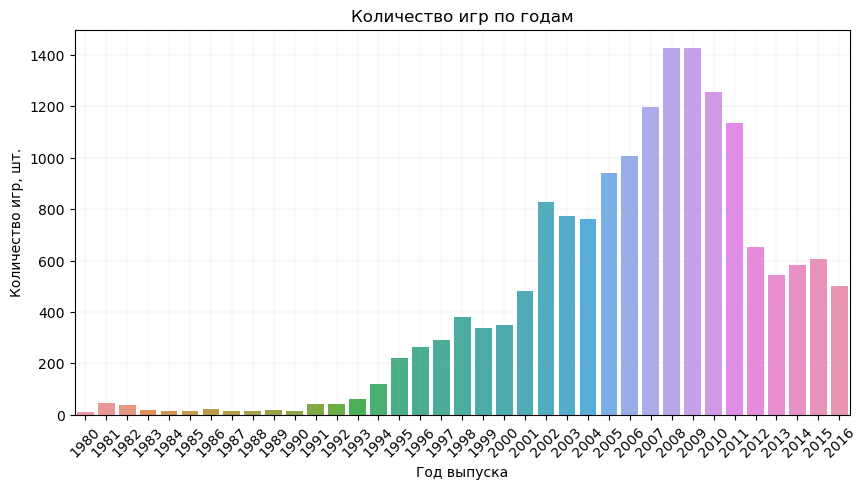

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year_of_release')
plt.title('Количество игр по годам')
plt.grid(True, linewidth=0.1)
plt.xlabel('Год выпуска')
plt.xticks(rotation=45)
plt.ylabel('Количество игр, шт.');

*На графике показаны игры с 1980 по 2016 год. С 1993 года выпуск игр начинает расти. Максимум достигается в 2008 году.
Далее начинается спад. С 2012 года наблюдается стабильность выпуска игр. Для интеренет-магазина "Стримчик" нужны данные о продажах игр только за 5-7 лет, т.к.приставки и игры постоянно улучшаются (обновляются), например, графика становится лучше. Поэтому пользователи стремятся покупать более новые версии.*

**3.2. Посмотрим, как менялись продажи по платформам.**

In [47]:
#посмотрим платформы с наибольшими суммарными продажами и выведем первые 10 строк
df.pivot_table(index='platform', values='total', aggfunc='sum').sort_values(by='total', ascending=False).head(10)

total
platform         
PS2       1233.56
X360       961.24
PS3        931.33
Wii        891.18
DS         802.78
PS         727.58
PS4        314.14
GBA        312.88
PSP        289.53
3DS        257.81

Наибольшие продажи у шести первых платформ

In [48]:
#запишем шесть первых платформ
total_six = df.pivot_table(index='platform', values='total', aggfunc='sum').sort_values(by='total', ascending=False).head(6)
total_six

total
platform         
PS2       1233.56
X360       961.24
PS3        931.33
Wii        891.18
DS         802.78
PS         727.58

In [49]:
#запишем наименования платформ списком
total_six_list = list(total_six.index[:])

In [50]:
total_six_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [51]:
#создадим даблицу для построения графика
pivot_table = df.loc[df['platform'].isin(total_six_list)].pivot_table(
    index='year_of_release', 
    values='total', 
    columns='platform', 
    aggfunc='sum'
)

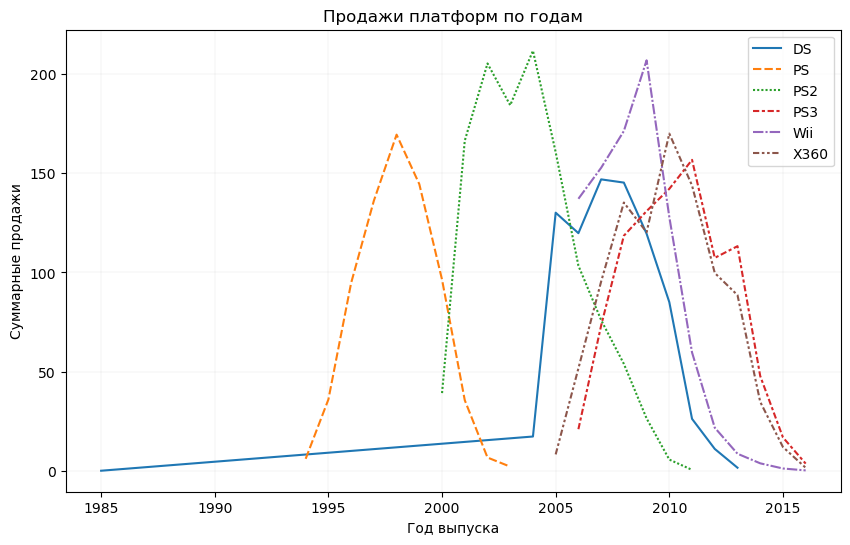

In [52]:
#построим для шести платформ график
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=pivot_table, ax=ax)
ax.legend()
plt.title('Продажи платформ по годам')
plt.grid(True, linewidth=0.1)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи') 
plt.show()

*На графике есть значение в 1985 году, которое выбивается*

In [53]:
#выведем эту строку
df[(df['platform'] == 'DS') & (df['year_of_release'] < 2002)]

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total  
15957  Unknown   0.02

Похоже на аномаль, т.к. эта игра встречается на DS, а DS появилось намного позже. Также по этой игре практически не было продаж. Поэтому удалим эту строку и перестроим график

In [54]:
df = df.drop(index=15957)

In [55]:
pivot_table = df.loc[df['platform'].isin(total_six_list)].pivot_table(
    index='year_of_release', 
    values='total', 
    columns='platform', 
    aggfunc='sum'
)

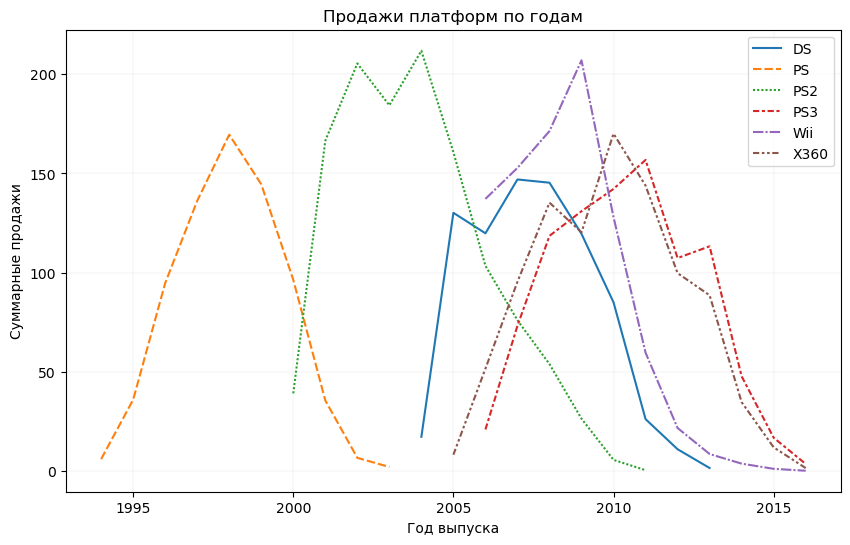

In [56]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=pivot_table, ax=ax)
ax.legend()
plt.title('Продажи платформ по годам')
plt.grid(True, linewidth=0.1)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи') 
plt.show()

*Наибольшие суммарные продажи, более 200 миллион проданных копий, у PS2 (2002 и 2004) и Wii (2009).*

Срок платформ:
+ PS с 1994 до 2000 (6 лет)
+ PS2 с 2000 до 2005 (5 лет)
+ PS3 с 2005 до 2013 (8 лет)
+ Wii c 2000 до 2010 (10 лет)
+ X360 c 2000 до 2010 (15 лет)

*Рассмотрим отдельно PS (т.к. другие платформы не выпускали за это время новые). Включим в рассмотрение еще PS4 (т.к. данные не полные, то из интернета взят год появления PS5 - 2020), т.е. c 2013 до 2020 (7 лет). Получаем, что срок появления платформ PS от 5 до 8 лет.
По графику видим, когда исчезают старые платформы, после появления новых: PS исчезла через 3 года, PS2 - 6 лет, PS3 - 3 года (PS4 вышла в 2013).*

In [57]:
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life['life'].median()

7.0

**3.3. Выберем актуальный период, который нам поможет построить прогноз на 2017 год.**

Мы увидели, что с 2012 года наблюдается стабильность выпуска игр. В 2013 году вышла PS4. Поэтому я предлагаю взять актуальный период с 2012 по 2016 года. 

**3.4. Выберем потенциально прибыльные платформы.**

In [58]:
#сохраним данные за актуальную дату
df_actual = df.loc[df['year_of_release'] > 2012]

In [59]:
df_actual.head()

name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96            97         8.2   
23      9.66      5.14      0.06         1.41            97         8.1   
31      6.03      5.86      0.36         2.38            -1        -1.0   
33      5.28      4.19      4.35         0.78            -1        -1.0   
42      3.96      6.31      0.38         1.97            97         8.3   

     rating  total  
16        M  21.05  
23        M  16.27  
31  Unknown  14.63  
33  Unknown  14.60  
42        M  12.62

In [60]:
#сгруппируем платформы по продажам по годам
df_actual.pivot_table(
    index='year_of_release', 
    values='total', 
    columns='platform', 
    aggfunc='sum'
)

platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU  \
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

In [61]:
#для построения графиков уберем платформы очень маленькие и те, которые перестали продаваться
platform_aktual = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV']

In [62]:
pivot_table_aktual = df_actual.loc[df_actual['platform'].isin(platform_aktual)].pivot_table(
    index='year_of_release', 
    values='total', 
    columns='platform', 
    aggfunc='sum'
)

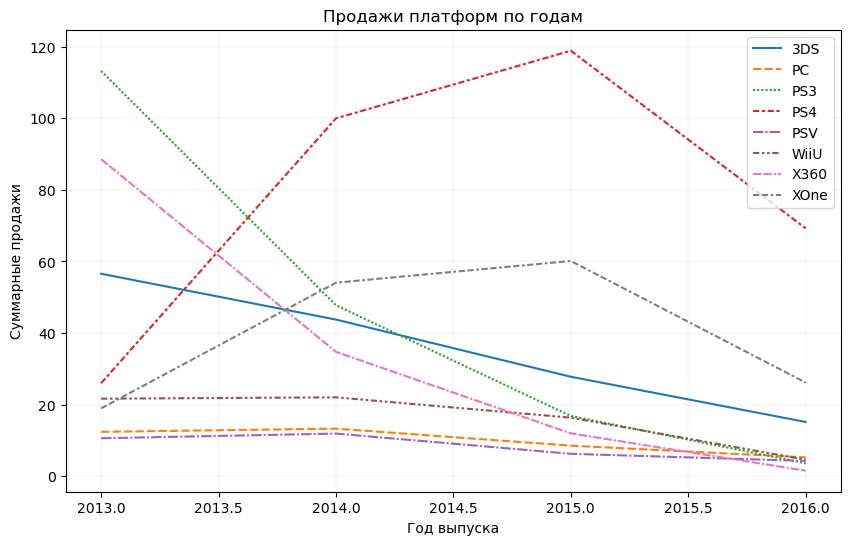

In [63]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=pivot_table_aktual, ax=ax)
ax.legend()
plt.title('Продажи платформ по годам')
plt.grid(True, linewidth=0.1)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи') 
plt.show()

*Растут продажи PS4, и XOne (если предположим, что за 2016 год они тоже росли, т.к. данные за 2016 год могут быть неполными).
DS и PSP перестали выпускаться.
У остальных платформ продажи падают.*

In [64]:
#выведем общие продажи платформ за актуальные годы
df_actual_total = df_actual.pivot_table(index='platform',
                                        values='total',
                                        aggfunc='sum').sort_values(by='total', ascending=False)
df_actual_total

total
platform        
PS4       314.14
PS3       181.43
XOne      159.32
3DS       143.25
X360      136.80
WiiU       64.63
PC         39.43
PSV        32.99
Wii        13.66
PSP         3.50
DS          1.54

In [65]:
platform_list = list(df_actual_total.index[:])

In [66]:
platform_list

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

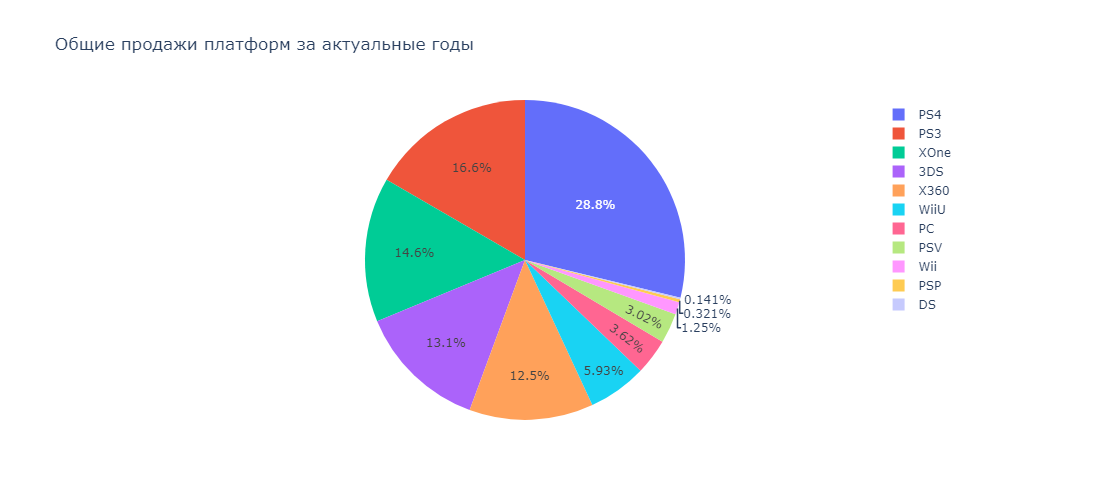

In [67]:
fig = px.pie(df_actual_total,
             values='total',
             names=platform_list,
             title='Общие продажи платформ за актуальные годы',
             labels=platform_list,
             width=700, height=500)
fig.show()

*Лидируют по продажам с 2012 по 2016 года:*
1. PS4 их общие продажи составили 314.14 млн проданных копий, что составило 28,8% от суммы всех продаж платформ;
2. PS3 - 181.43 млн проданных копий, что составило 16,6%;
3. XOne - 159.32 млн проданных копий, что составило 14,6%,
4. 3DS - 143.25 млн проданных копий, что составило 13,1%,
5. X360 - 136.8 млн проданных копий, что составило 12,5%

**3.5. Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.**

In [68]:
#посмотрим статистику
df_actual['total'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total, dtype: float64

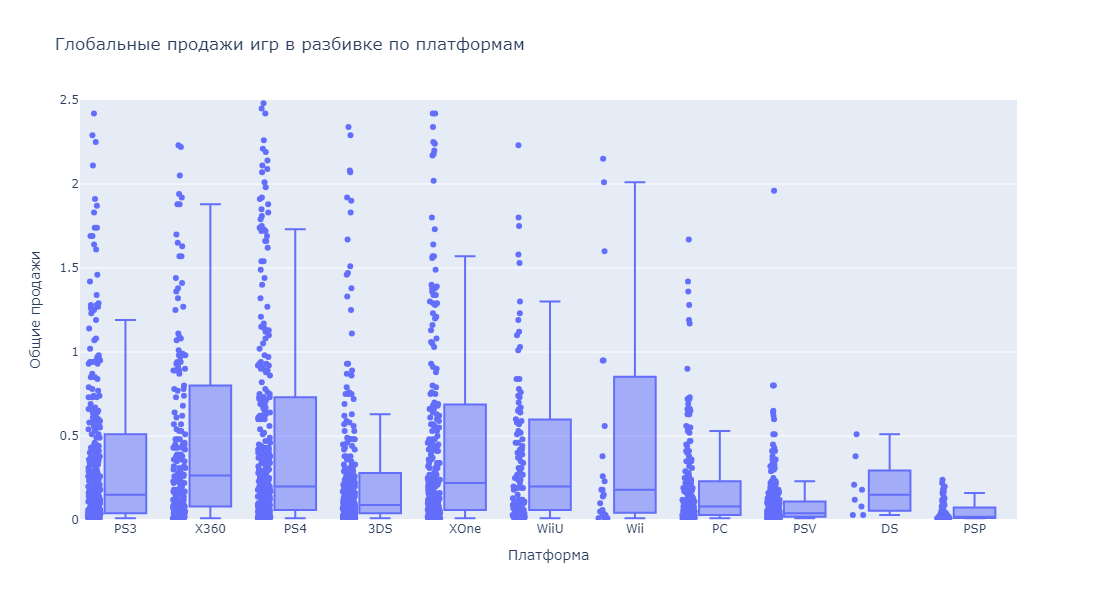

<Figure size 1200x600 with 0 Axes>

In [69]:
#нарисуем "ящики с усами"
plt.figure(figsize=(12,6))
fig = px.box(df_actual,
             x='platform', y='total',
             points='all',
             title='Глобальные продажи игр в разбивке по платформам',
             width=1100, height=600)
fig.update_layout(xaxis_title='Платформа', yaxis_title='Общие продажи', yaxis=dict(range=[0, 2.5]))
fig.show()

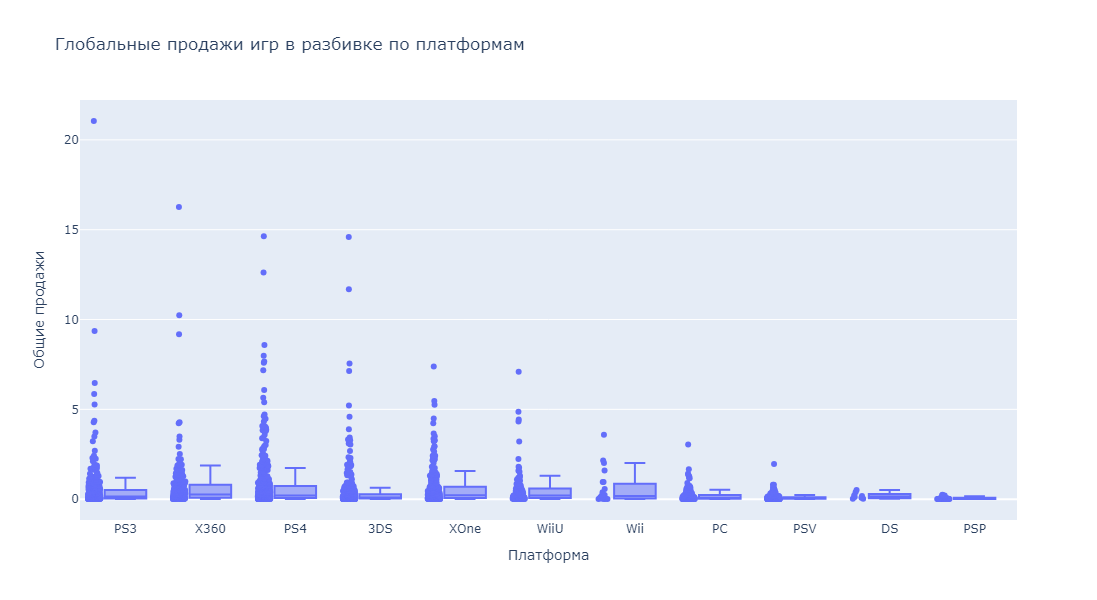

<Figure size 1200x600 with 0 Axes>

In [70]:
plt.figure(figsize=(12,6))
fig = px.box(df_actual,
             x='platform', y='total',
             points='all',
             title='Глобальные продажи игр в разбивке по платформам',
             width=1100, height=600)
fig.update_layout(xaxis_title='Платформа', yaxis_title='Общие продажи')
fig.show()

*Каждая платформа имеет выбросы значений, разные межквартальные размахи. Общее медианное значение 0.487957 отличается от медианных значений платформ.
Минимальное значение продаж равно 0.01, а максимальное 21.05*

**3.6. Влияние на продажи внутри одной платформы отзывов пользователей и критиков.**

In [71]:
# df_ps_ = df_actual[(df_actual['platform'] == 'PS4') & (df_actual['critic_score'] > -1) & (df_actual['user_score'] > -1)]

In [72]:
# отберем 5 платформ с максимальными продажами
platform_five = df_actual.pivot_table(index='platform',
                                      values='total',
                                      aggfunc='sum').sort_values(by='total', ascending=False).reset_index().head()

In [73]:
platform_five_list = list(platform_five['platform'])

In [74]:
platform_five_list

['PS4', 'PS3', 'XOne', '3DS', 'X360']

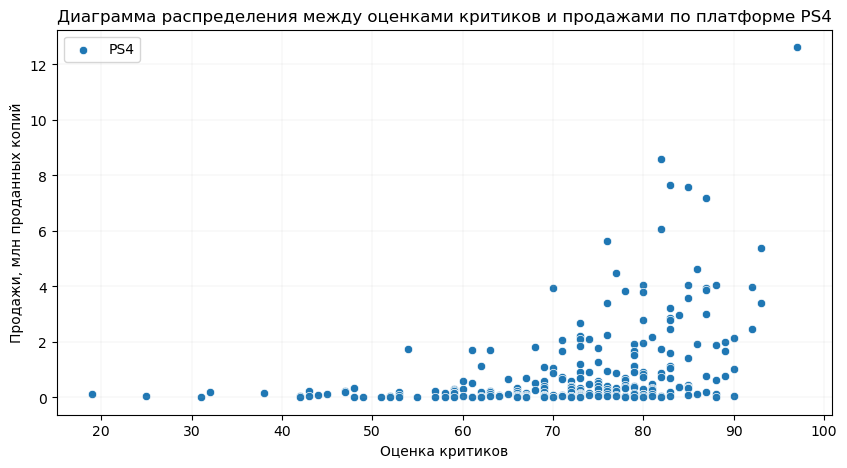

Коэффициент корреляции между оценками критиков и продажами по платформе PS4 = 0.40656790206178095


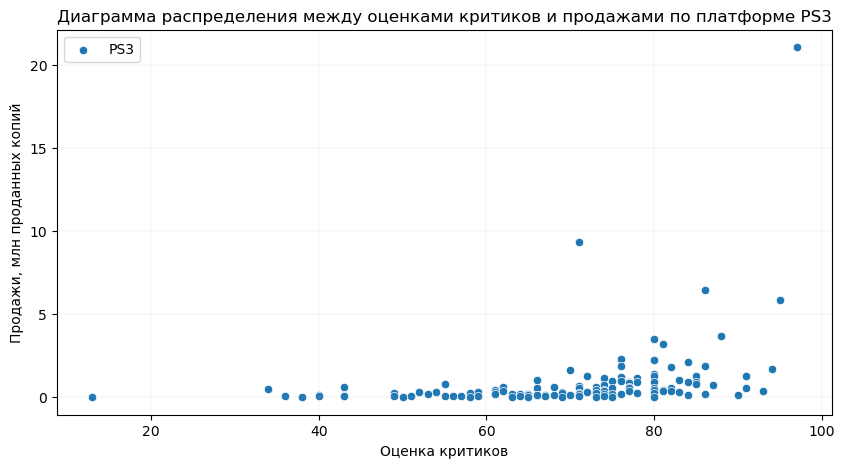

Коэффициент корреляции между оценками критиков и продажами по платформе PS3 = 0.3342853393371919


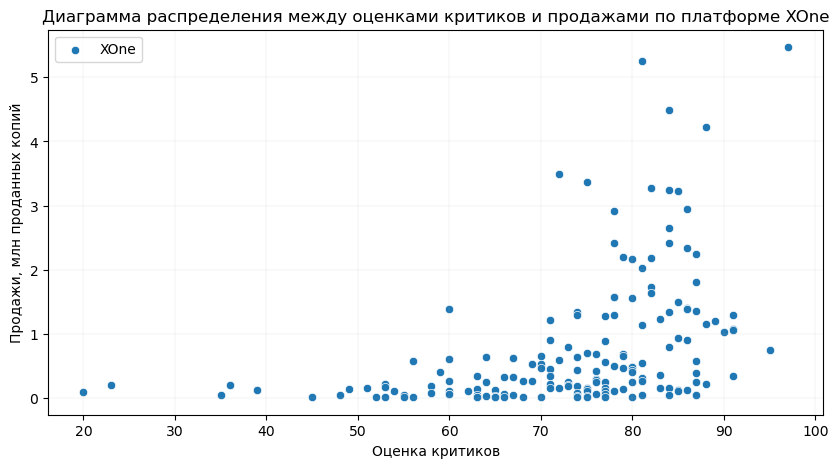

Коэффициент корреляции между оценками критиков и продажами по платформе XOne = 0.4169983280084017


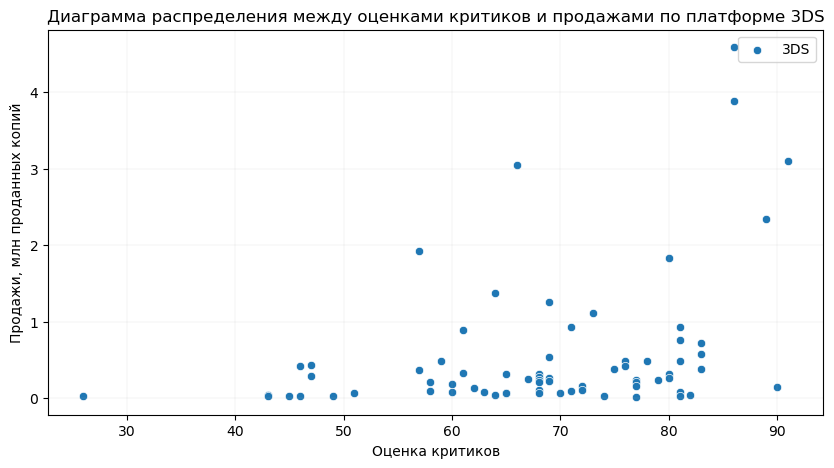

Коэффициент корреляции между оценками критиков и продажами по платформе 3DS = 0.3570566142288103


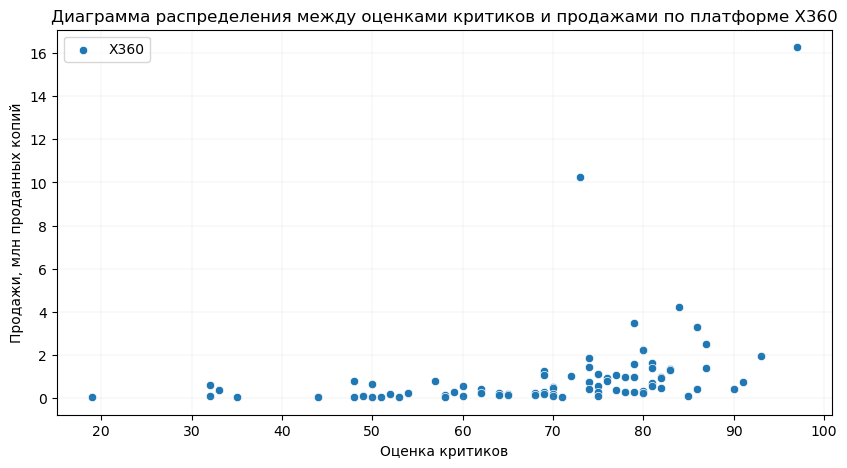

Коэффициент корреляции между оценками критиков и продажами по платформе X360 = 0.3503445460228664


In [75]:
# сделаем графики и определим коэффициент корреляции для оценки критиков
for name in platform_five_list:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(
        data=df_actual.loc[(df_actual['platform'] == name) & (df_actual['critic_score'] > -1)],
        x='critic_score',
        y='total')
    plt.grid(True, linewidth=0.1)
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн проданных копий')
    plt.legend([name])
    plt.show()
    score = df_actual.loc[(df_actual['platform'] == name) & (df_actual['critic_score'] > -1)]['critic_score'].corr(df_actual.loc[(df_actual['platform'] == name) & (df_actual['critic_score'] > -1)]['total'])
    print(f'Коэффициент корреляции между оценками критиков и продажами по платформе {name} = {score}')

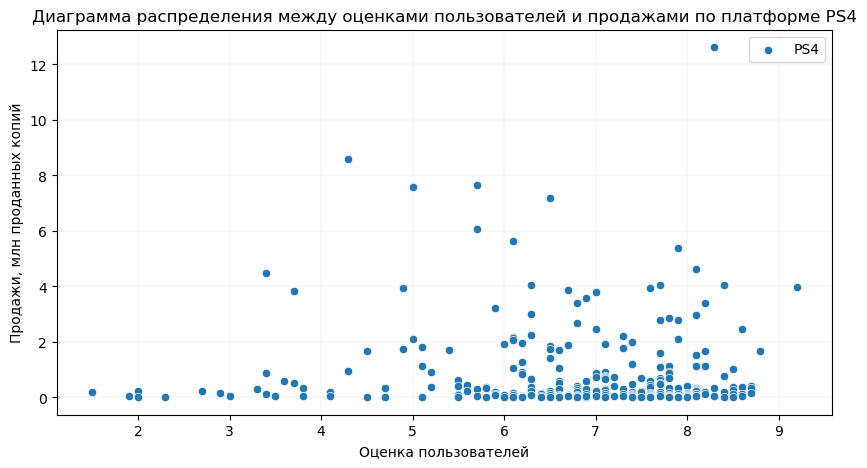

Коэффициент корреляции между оценками пользователей и продажами по платформе PS4 = -0.031957110204556376


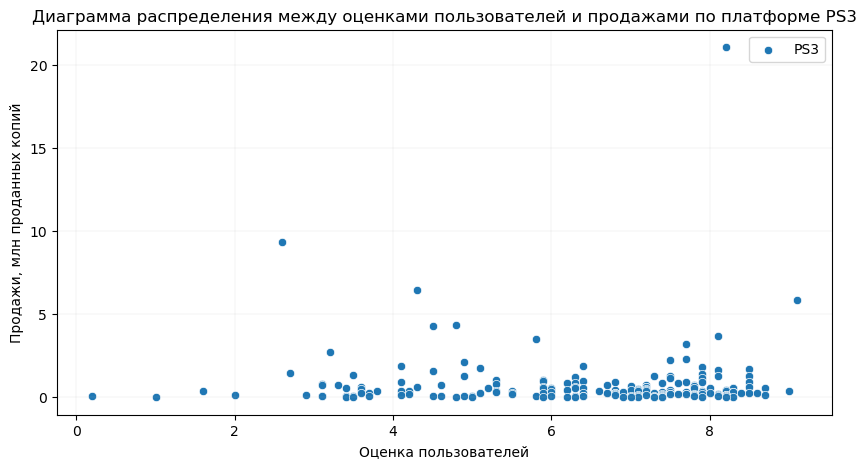

Коэффициент корреляции между оценками пользователей и продажами по платформе PS3 = 0.0023944027357566925


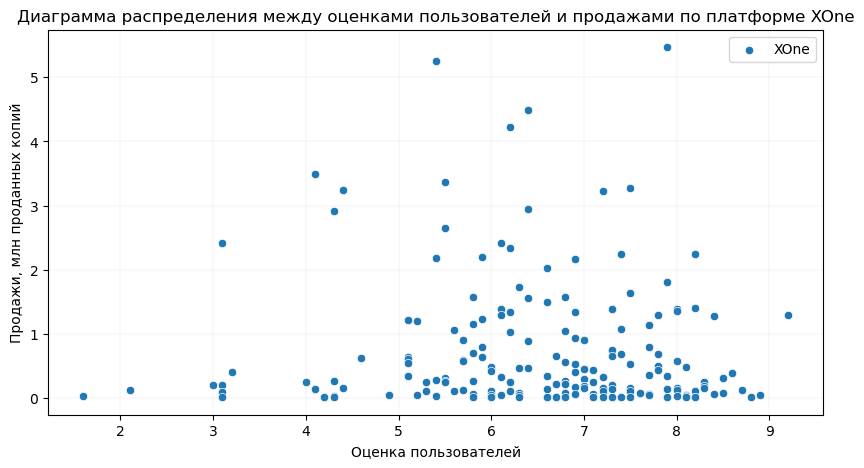

Коэффициент корреляции между оценками пользователей и продажами по платформе XOne = -0.06892505328279414


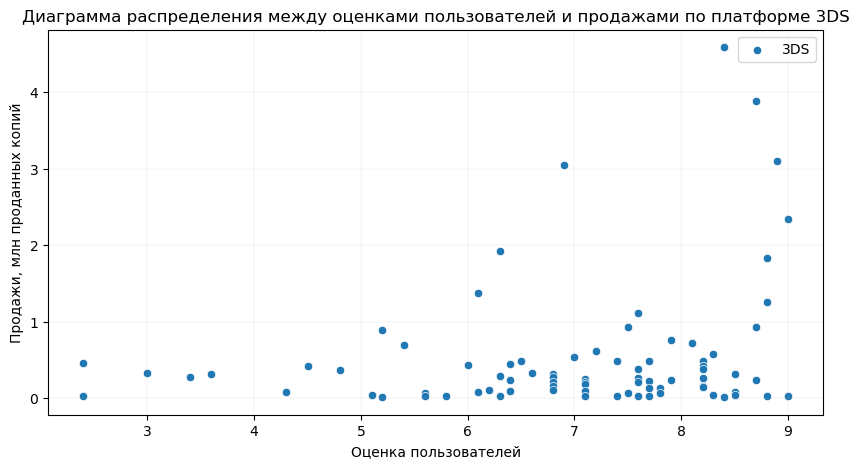

Коэффициент корреляции между оценками пользователей и продажами по платформе 3DS = 0.24150411773563016


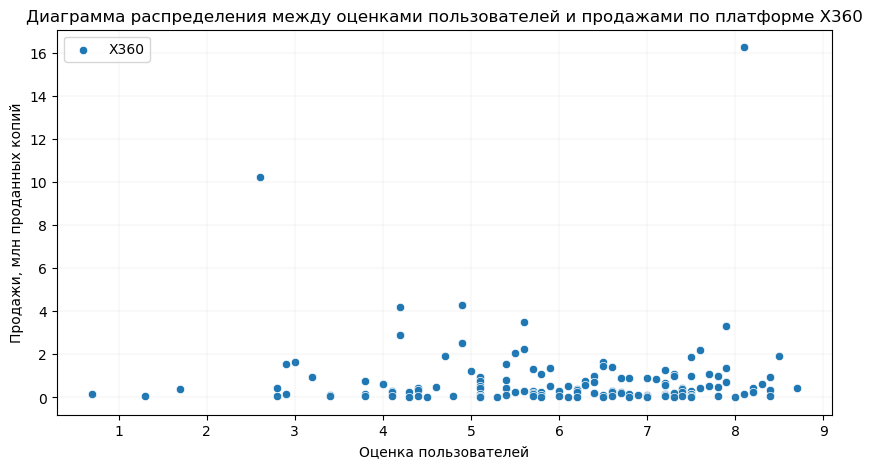

Коэффициент корреляции между оценками пользователей и продажами по платформе X360 = -0.011742185147181342


In [76]:
# сделаем графики и определим коэффициент корреляции для оценки пользователей
for name in platform_five_list:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(
        data=df_actual.loc[(df_actual['platform'] == name) & (df_actual['user_score'] > -1)],
        x='user_score',
        y='total')
    plt.grid(True, linewidth=0.1)
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн проданных копий')
    plt.legend([name])
    plt.show()
    score = df_actual.loc[(df_actual['platform'] == name) & (df_actual['user_score'] > -1)]['user_score'].corr(df_actual.loc[(df_actual['platform'] == name) & (df_actual['user_score'] > -1)]['total'])
    print(f'Коэффициент корреляции между оценками пользователей и продажами по платформе {name} = {score}')

*Оценка критиков влияет на продажи, но не сильно, т.к. корреляция равна от ~0.33 до 0.42.*
*Коэффициент корреляции между оценками критиков и продажами:*
+ PS4 = 0.40656790206178095
+ PS3 = 0.3342853393371919
+ XOne = 0.4169983280084017
+ 3DS = 0.3570566142288103
+ X360 = 0.3503445460228664

*Оценка пользователей не влияет на продажи. Коэффициент корреляции между оценками пользователей и продажами от ~ -0.07 до 0.24:*
+ PS4 = -0.031957110204556376
+ PS3 = 0.0023944027357566925
+ XOne = -0.06892505328279414
+ 3DS = 0.24150411773563016
+ X360 = -0.011742185147181342

In [77]:
print(len(df_actual.query("critic_score > -1")))
print(len(df_actual.query("user_score > -1")))
print(len(df_actual.query("critic_score > -1 & user_score > -1")))

991
1192
976


**3.7. Общее распределение игр по жанрам.**

In [78]:
#создадим таблицу с жанрами и продажами
df_genre = df_actual[['genre', 'total']]

In [79]:
df_genre

genre  total
16           Action  21.05
23           Action  16.27
31          Shooter  14.63
33     Role-Playing  14.60
42           Action  12.62
...             ...    ...
16703     Adventure   0.01
16707          Misc   0.01
16710        Action   0.01
16712     Adventure   0.01
16714    Simulation   0.01

[2233 rows x 2 columns]

In [80]:
#посмотрим жанры с высокими и низкими продажами
df_genre_sort = df_genre.pivot_table(index='genre', values='total', aggfunc='sum').sort_values(by='total', ascending=False)

In [81]:
df_genre_sort

total
genre               
Action        321.87
Shooter       232.98
Sports        150.65
Role-Playing  145.89
Misc           62.82
Platform       42.63
Racing         39.89
Fighting       35.31
Adventure      23.64
Simulation     21.76
Strategy       10.08
Puzzle          3.17

In [82]:
df_genre_sort_list = list(df_genre_sort.index[:])

In [83]:
df_genre_sort_list

['Action',
 'Shooter',
 'Sports',
 'Role-Playing',
 'Misc',
 'Platform',
 'Racing',
 'Fighting',
 'Adventure',
 'Simulation',
 'Strategy',
 'Puzzle']

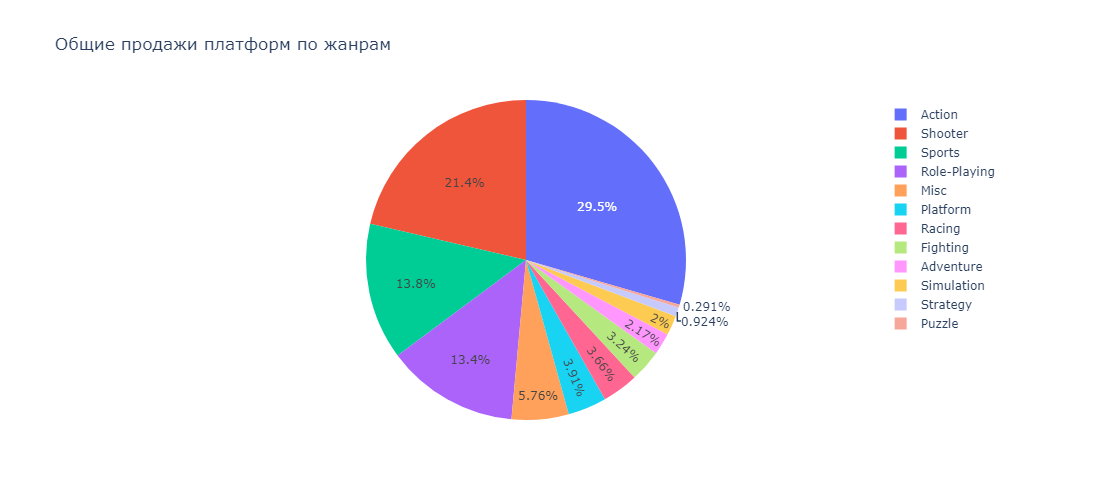

In [84]:
fig = px.pie(df_genre_sort,
             values='total',
             names=df_genre_sort_list,
             title='Общие продажи платформ по жанрам',
             labels=df_genre_sort_list,
             width=700, height=500)
fig.show()

*Самые популярные (прибыльные жанры):*
1. Action (322 млн проданных копий, экшен-игры) и Shooter (232.98, это поджанр Action сражение с использованием оружия),
2. Sports (150.65) и Role-Playing(145.89).

*Мы видим, что на первом месте пользуются популярностью игры, акцент которых делается на скорость реакции игрока и зрительно-моторную координацию. На втором месте игры, где может играть более двух человек.*

*С низкими продажами это Puzzle (3.17) и Strategy (10.08). Игры, целью которых является решение логических задач и головоломок.*

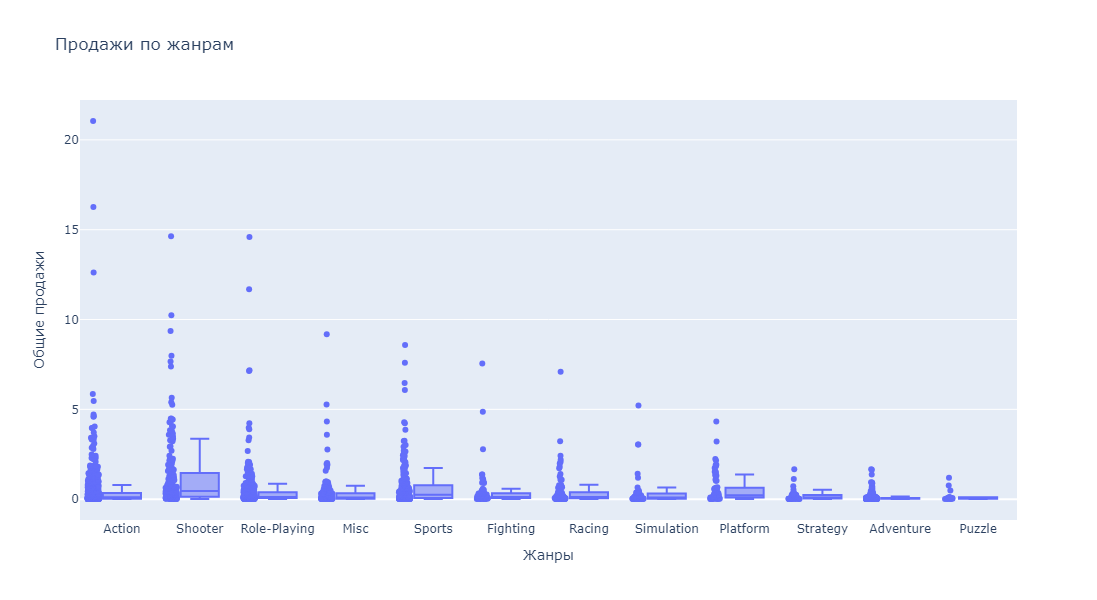

<Figure size 1200x600 with 0 Axes>

In [85]:
# добавим сравнение медианных продаж, проиллюстрировав их диаграммами размаха
plt.figure(figsize=(12,6))
fig = px.box(df_actual,
             x='genre', y='total',
             points='all',
             title='Продажи по жанрам',
             width=1100, height=600)
fig.update_layout(xaxis_title='Жанры', yaxis_title='Общие продажи')
fig.show()

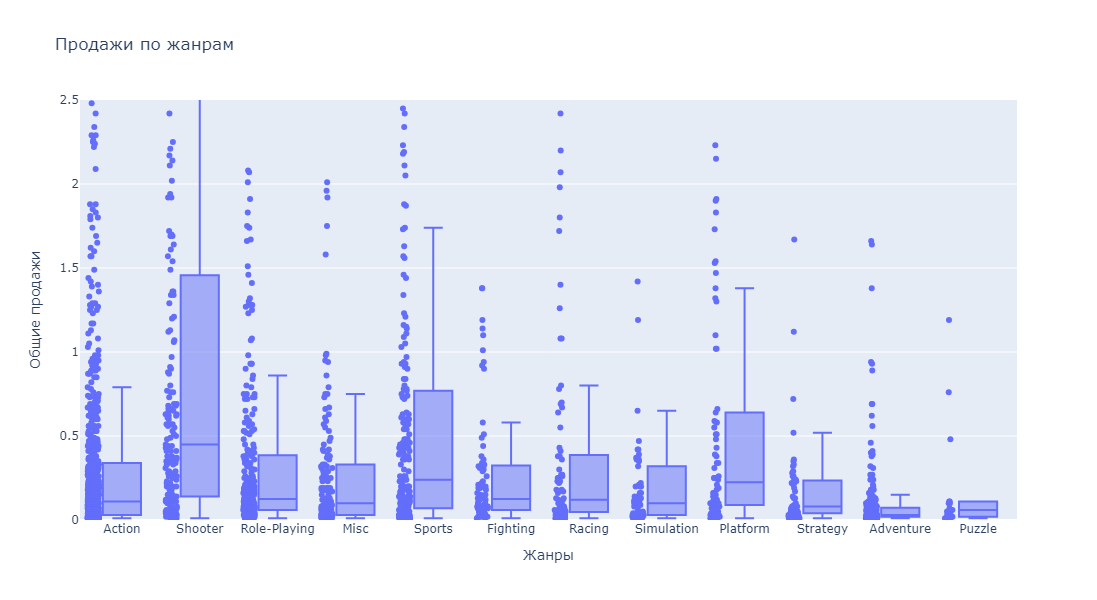

<Figure size 1200x600 with 0 Axes>

In [86]:
#нарисуем "ящики с усами"
plt.figure(figsize=(12,6))
fig = px.box(df_actual,
             x='genre', y='total',
             points='all',
             title='Продажи по жанрам',
             width=1100, height=600)
fig.update_layout(xaxis_title='Жанры', yaxis_title='Общие продажи', yaxis=dict(range=[0, 2.5]))
fig.show()

*По графикам размаха видны медианные значения по продажам жанров. Они показывают, что предпочтение в жанрах надо отдавать стабильным жанрам Shooter и Sports, которые дают устойчивый спрос (у них больше медианное значением прибыли).*

<span style="color:purple">**Вывод:**</span> проведя исследовательский анализ, мы получили:
1. С 1993 года выпуск игр начинает расти. Максимум достигается в 2008 году. Далее начинается спад. С 2012 года наблюдается стабильность выпуска игр. Для интеренет-магазина "Стримчик" нужны данные о продажах игр только за 5-7 лет, т.к.приставки и игры постоянно улучшаются (обновляются), например, графика становится лучше. Поэтому пользователи стремятся покупать более новые версии.
2. Обнаружена аномаль в строке с игрой 1985 года "Strongest Tokyo University Shogi DS". Эта игра встречается на DS, а DS появилось намного позже и по игре практически не было продаж. Поэтому удалили эту строку.
3. С 2012 года наблюдается стабильность выпуска игр. В 2013 году вышла популярная платформа PS4. Поэтому был взят актуальный период с 2012 по 2016 года.
4. Лидируют по продажам с 2012 по 2016 года:
+ PS4 их общие продажи составили 314.14 млн проданных копий, что составило 28,8% от суммы всех продаж платформ;
+ PS3 - 181.43 млн проданных копий, что составило 16,6%;
+ XOne - 159.32 млн проданных копий, что составило 14,6%,
+ 3DS - 143.25 млн проданных копий, что составило 13,1%,
+ X360 - 136.8 млн проданных копий, что составило 12,5%
5. При построении графика "ящик с усами" мы увидели, что каждая платформа имеет выбросы значений, разные межквартальные размахи. Общее медианное значение 0.487957 отличалось от медианных значений платформ. Минимальное значение продаж равно 0.01, а максимальное 21.05.
6. У платформы 'PS4' оценка критиков влияет на продажи, но не сильно, т.к. корреляция равна ~0.41. Оценка пользователей не влияет на продажи.
7. У остальных платформ также оценка критиков влияет на продажи, но не сильно, т.к. корреляция равна от ~0.33 до 0.42. Оценка пользователей не влияет на продажи. Коэффициент корреляции между оценками пользователей и продажами от ~ -0.07 до 0.24.
8. Самые популярные (прибыльные жанры):
+ Action (322 млн проданных копий, экшен-игры)
+ Shooter (232.98, это поджанр Action сражение с использованием оружия)
+ Sports (150.65)
+ Role-Playing (145.89).
На первом и втором месте пользуются популярностью игры, акцент которых делается на скорость реакции игрока и зрительно-моторную координацию. На третьем и четвертом месте игры, где может играть более двух человек. 
С низкими продажами Puzzle (3.17) и Strategy (10.08). Игры, целью которых является решение логических задач и головоломок.

Но сравнивая медианные значения по продажам жанров увидели, что предпочтение в жанрах надо отдавать Shooter и Sports, которые обладают большим медианным значением прибыли, и следовательно, дают устойчивый спрос.

## 4. Составление портрета пользователя каждого региона (NA, EU, JP)

**4.1. Самые популярные платформы (топ-5).**

In [87]:
#создадим таблицу NA
na_platform = df_actual.pivot_table(index='platform',
                      values='na_sales',
                      aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

In [88]:
na_platform.loc[5:,'platform'] = 'Other'

In [89]:
na_platform.loc[5,'na_sales'] =  na_platform.loc[5:,'na_sales'].sum().round(2)

In [90]:
na_platform_sum = na_platform.pivot_table(index='platform',
                      values='na_sales',
                      aggfunc='sum').reset_index()

In [91]:
na_platform_sum

platform  na_sales
0      3DS     38.20
1    Other     75.77
2      PS3     63.50
3      PS4    108.74
4     X360     81.66
5     XOne     93.12

In [92]:
#создадим таблицу EU
eu_platform = df_actual.pivot_table(index='platform',
                      values='eu_sales',
                      aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

In [93]:
eu_platform.loc[5:,'platform'] = 'Other'

In [94]:
eu_platform.loc[5,'eu_sales'] =  eu_platform.loc[5:,'eu_sales'].sum().round(2)

In [95]:
eu_platform_sum = eu_platform.pivot_table(index='platform',
                      values='eu_sales',
                      aggfunc='sum').reset_index()

In [96]:
eu_platform_sum

platform  eu_sales
0      3DS     30.96
1    Other     91.16
2      PS3     67.81
3      PS4    141.09
4     X360     42.52
5     XOne     51.59

In [97]:
#создадим таблицу JP
jp_platform = df_actual.pivot_table(index='platform',
                      values='jp_sales',
                      aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

In [98]:
jp_platform.loc[5:,'platform'] = 'Other'

In [99]:
jp_platform.loc[5,'jp_sales'] =  jp_platform.loc[5:,'jp_sales'].sum().round(2)

In [100]:
jp_platform_sum = jp_platform.pivot_table(index='platform',
                      values='jp_sales',
                      aggfunc='sum').reset_index()

In [101]:
jp_platform_sum

platform  jp_sales
0      3DS     67.81
1    Other      5.09
2      PS3     23.35
3      PS4     15.96
4      PSV     18.59
5     WiiU     10.88

In [102]:
#соединим все в одну таблицу
na_platform.join(eu_platform, how='inner', lsuffix='_na', rsuffix='_eu').join(jp_platform, how='inner').head()

platform_na  na_sales platform_eu  eu_sales platform  jp_sales
0         PS4    108.74         PS4    141.09      3DS     67.81
1        XOne     93.12         PS3     67.81      PS3     23.35
2        X360     81.66        XOne     51.59      PSV     18.59
3         PS3     63.50        X360     42.52      PS4     15.96
4         3DS     38.20         3DS     30.96     WiiU     10.88

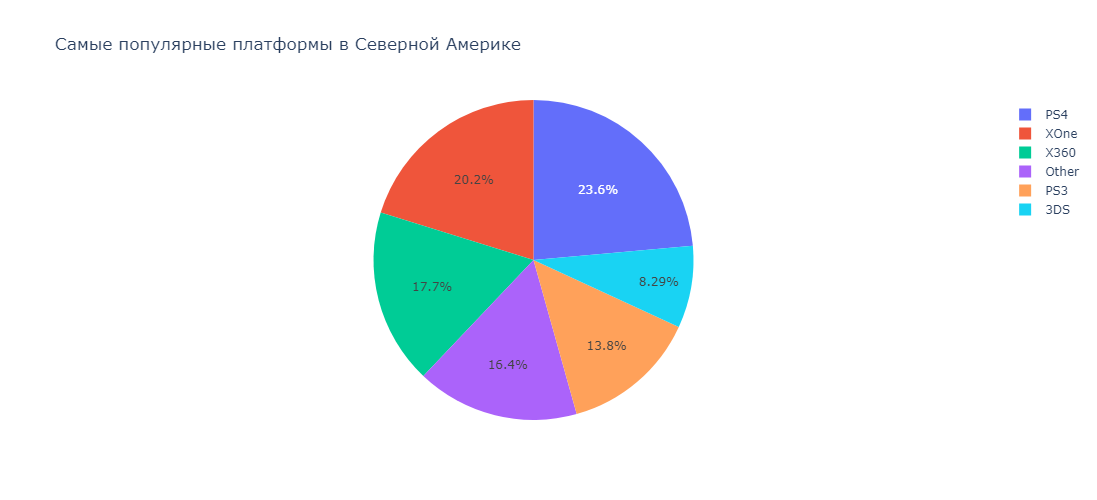

In [103]:
fig = px.pie(na_platform,
             values='na_sales',
             names='platform',
             title='Самые популярные платформы в Северной Америке',
             width=700, height=500)
fig.show()

*Самые популярные платформы в Северной Америке: 'PS4' (28.2%), 'XOne' (24.2%), 'X360' (21.2%), 'PS3' (16.5%), '3DS' (9.92%).*

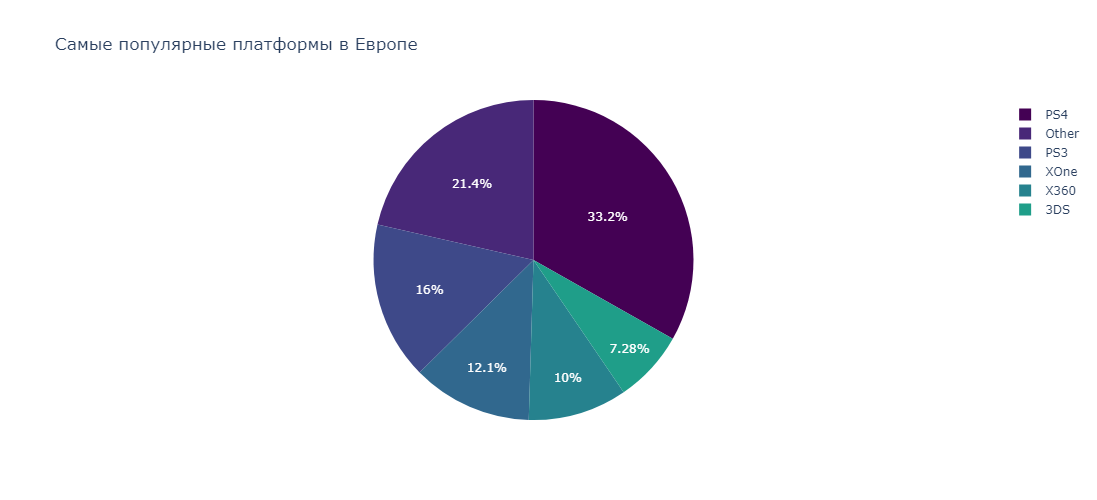

In [104]:
fig = px.pie(eu_platform,
             values='eu_sales',
             names='platform',
             title='Самые популярные платформы в Европе',
             color_discrete_sequence=px.colors.sequential.Viridis,
             width=700, height=500)
fig.show()

*Самые популярные платформы в Европе: 'PS4' (42.2%), 'PS3' (20.3%), 'XOne' (15.4%), 'X360' (12.7%), '3DS' (9.27%).*

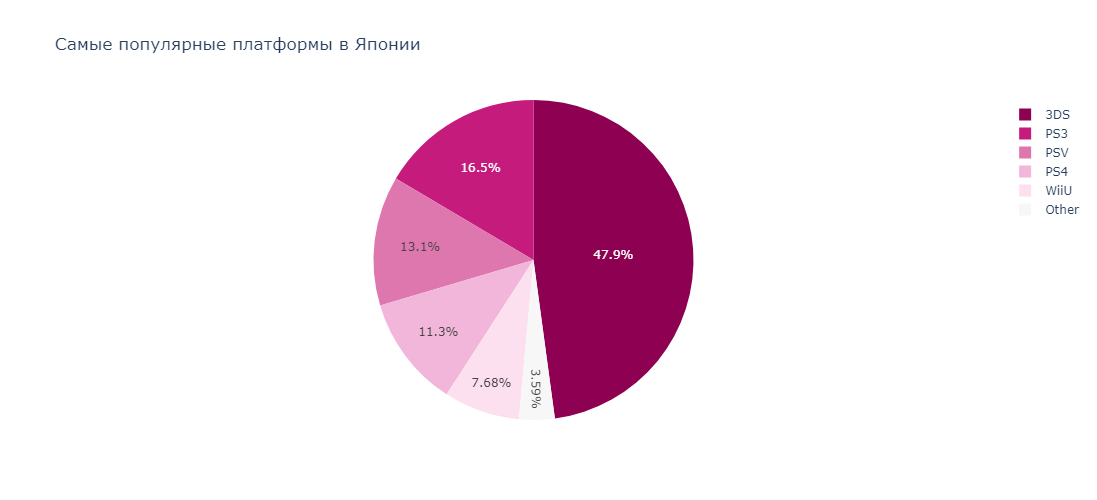

In [105]:
fig = px.pie(jp_platform,
             values='jp_sales',
             names='platform',
             title='Самые популярные платформы в Японии',
             color_discrete_sequence=px.colors.diverging.PiYG,
             width=700, height=500)
fig.show()

*Самые популярные платформы в Японии: '3DS' (49.6%), 'PS3' (17.1%), 'PSV' (13.6%), 'PS4' (11.7%), 'WiiU' (7.97%).*

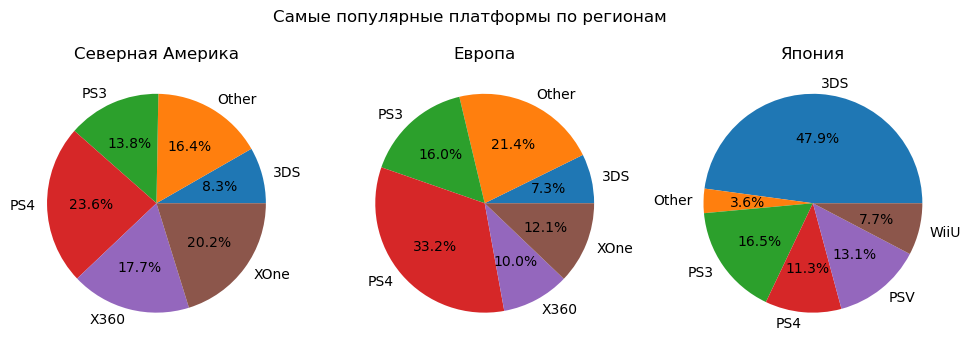

In [106]:
# Создание фигуры с тремя подграфиками
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axs[0].pie(na_platform_sum['na_sales'], labels=na_platform_sum['platform'], autopct='%1.1f%%')
axs[0].set_title('Северная Америка')

# Построение второй круговой диаграммы
axs[1].pie(eu_platform_sum['eu_sales'], labels=eu_platform_sum['platform'], autopct='%1.1f%%')
axs[1].set_title('Европа')

# Построение третьей круговой диаграммы
axs[2].pie(jp_platform_sum['jp_sales'], labels=jp_platform_sum['platform'], autopct='%1.1f%%')
axs[2].set_title('Япония')

# Добавление общего заголовка
fig.suptitle('Самые популярные платформы по регионам')

# Отображение графика
plt.show()

*В Серевной Америке топ-5 платформ: 'PS4' (108.74), 'XOne' (93.12), 'X360' (81.66), 'PS3' (63.50), '3DS' (38.20).*

*В Европе топ-5 платформ: 'PS4' (141.09), 'PS3' (67.81), 'XOne' (51.59), 'X360' (42.52), '3DS' (30.96).*

*В Японии топ-5 платформ: '3DS' (67.81), 'PS3' (23.35), 'PSV' (18.59), 'PS4' (15.96), 'WiiU' (10.88).*

*В Серевной Америке и Европе вкусы похожи, в первую петерку попали одинаковые платформы. 'PS4' находится на первом месте, а на последнем 'PSP'. Но в Северной Америке доля 'PS4' (28.2%), а Европе - 42.2%. С Японией предпочтения сильно отличаются, 'PS4' у них только на четвертом месте, а первое место занимает платформа '3DS' (ее доля в Японии достигает 49.6%)*

**4.2. Самые популярные жанры  (топ-5).**

In [107]:
na_genre = df_actual.pivot_table(index='genre',
                      values='na_sales',
                      aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

In [108]:
na_genre.loc[5:,'genre'] = 'Other'

In [109]:
na_genre.loc[5,'na_sales'] =  na_genre.loc[5:,'na_sales'].sum().round(2)

In [110]:
na_genre_sum = na_genre.pivot_table(index='genre',
                      values='na_sales',
                      aggfunc='sum').reset_index()

In [111]:
eu_genre = df_actual.pivot_table(index='genre',
                      values='eu_sales',
                      aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

In [112]:
eu_genre.loc[5:,'genre'] = 'Other'

In [113]:
eu_genre.loc[5,'eu_sales'] =  eu_genre.loc[5:,'eu_sales'].sum().round(2)

In [114]:
eu_genre_sum = eu_genre.pivot_table(index='genre',
                      values='eu_sales',
                      aggfunc='sum').reset_index()

In [115]:
jp_genre = df_actual.pivot_table(index='genre',
                      values='jp_sales',
                      aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

In [116]:
jp_genre.loc[5:,'genre'] = 'Other'

In [117]:
jp_genre.loc[5,'jp_sales'] =  jp_genre.loc[5:,'jp_sales'].sum().round(2)

In [118]:
jp_genre_sum = jp_genre.pivot_table(index='genre',
                      values='jp_sales',
                      aggfunc='sum').reset_index()

In [119]:
na_genre.join(eu_genre, how='inner', lsuffix='_na', rsuffix='_eu').join(jp_genre, how='inner').head()

genre_na  na_sales      genre_eu  eu_sales         genre  jp_sales
0        Action    126.05        Action    118.13  Role-Playing     51.04
1       Shooter    109.74       Shooter     87.86        Action     40.49
2        Sports     65.27        Sports     60.52          Misc      9.20
3  Role-Playing     46.40  Role-Playing     36.97      Fighting      7.65
4          Misc     27.49        Racing     20.19       Shooter      6.61

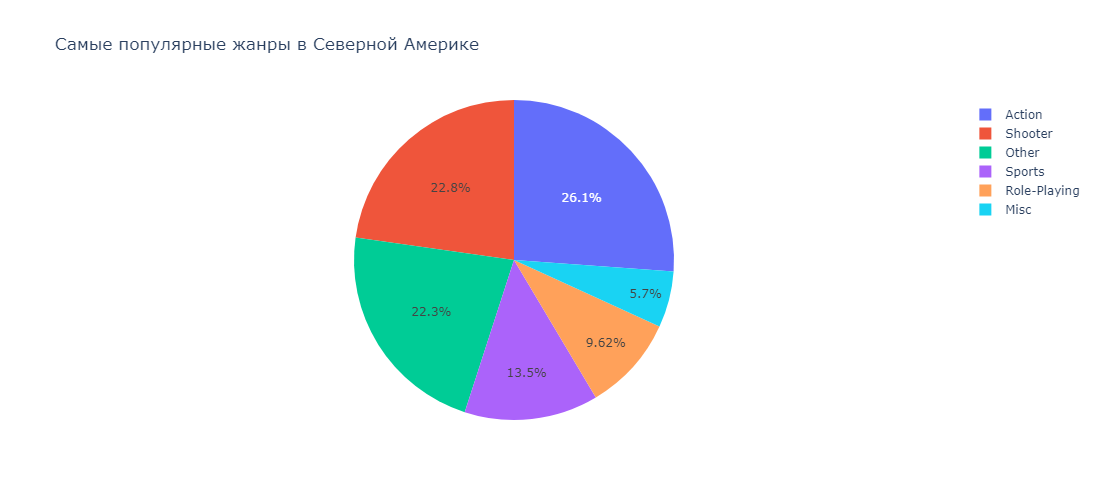

In [120]:
#посмотрим графики
fig = px.pie(na_genre,
             values='na_sales',
             names='genre',
             title='Самые популярные жанры в Северной Америке',
             width=700, height=500)
fig.show()

*Самые популярные жанры в Северной Америке: 'Action' (33.6%), 'Shooter' (29.3%), 'Sports' (17.4%), 'Role-Playing' (12.4%), 'Misc' (7.33%).*

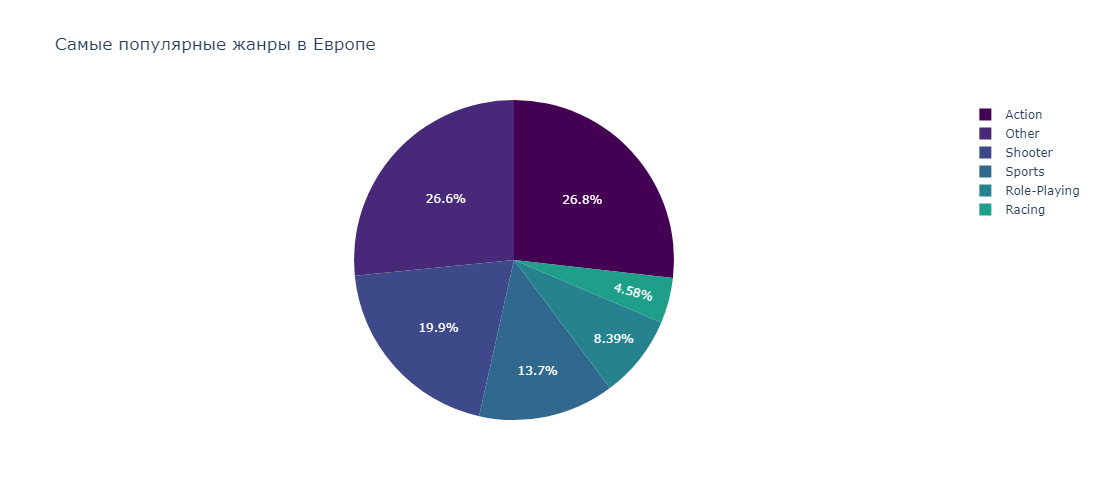

In [121]:
fig = px.pie(eu_genre,
             values='eu_sales',
             names='genre',
             title='Самые популярные жанры в Европе',
             color_discrete_sequence=px.colors.sequential.Viridis,
             width=700, height=500)
fig.show()

*Самые популярные жанры в Европе: 'Action' (36.5%), 'Shooter' (27.1%), 'Sports' (18.7%), 'Role-Playing' (11.4%), 'Racing' (6.24%).*

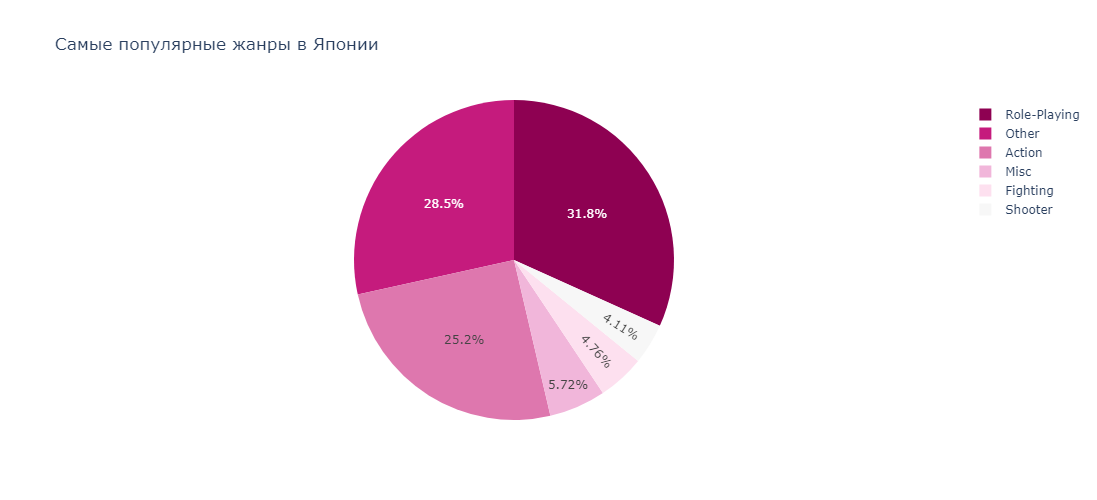

In [122]:
fig = px.pie(jp_genre,
             values='jp_sales',
             names='genre',
             title='Самые популярные жанры в Японии',
             color_discrete_sequence=px.colors.diverging.PiYG,
             width=700, height=500)
fig.show()

*Самые популярные жанры в Японии: 'Role-Playing' (44.4%), 'Action' (35.2%), 'Misc' (8%), 'Fighting' (6.65%), 'Shooter' (5.75%).*

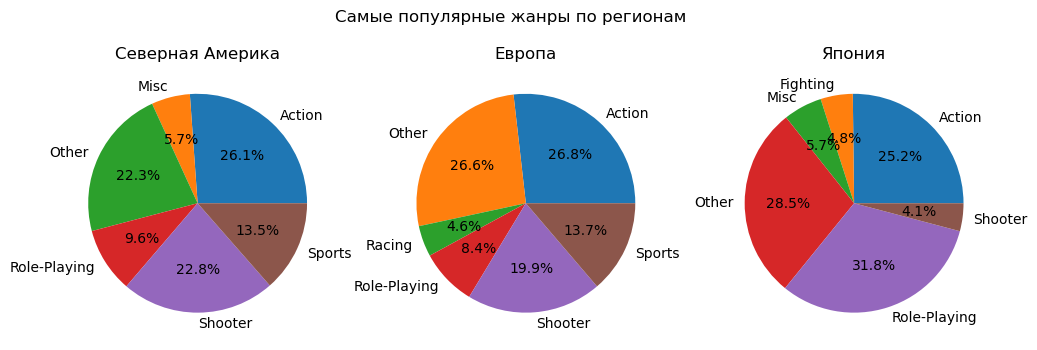

In [123]:
# Создание фигуры с тремя подграфиками
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axs[0].pie(na_genre_sum['na_sales'], labels=na_genre_sum['genre'], autopct='%1.1f%%')
axs[0].set_title('Северная Америка')

# Построение второй круговой диаграммы
axs[1].pie(eu_genre_sum['eu_sales'], labels=eu_genre_sum['genre'], autopct='%1.1f%%')
axs[1].set_title('Европа')

# Построение третьей круговой диаграммы
axs[2].pie(jp_genre_sum['jp_sales'], labels=jp_genre_sum['genre'], autopct='%1.1f%%')
axs[2].set_title('Япония')

# Добавление общего заголовка
fig.suptitle('Самые популярные жанры по регионам')

# Отображение графика
plt.show()

*В Серевной Америке топ-5 жанров игр: 'Action' (126.05), 'Shooter' (109.74), 'Sports' (65.27), 'Role-Playing' (46.40), 'Misc' (27.49).*

*В Европе топ-5 жанров игр: 'Action' (118.13), 'Shooter' (87.86), 'Sports' (60.52), 'Role-Playing' (36.97), 'Racing' (20.19).*

*В Японии топ-5 жанров игр: 'Role-Playing' (51.04), 'Action' (40.49), 'Misc' (9.20), 'Fighting' (7.65), 'Shooter' (6.61).*

*В Серевной Америке и Европе первые четыре жанра одинаковые. Доли жанров разбиты равномерно. А вот у Японии большую долю занимают всего два жанра - 'Role-Playing' и 'Action', их доля 44.4% и 35.2%.*

**4.3. Влияние рейтинга ESRB на продажи.**

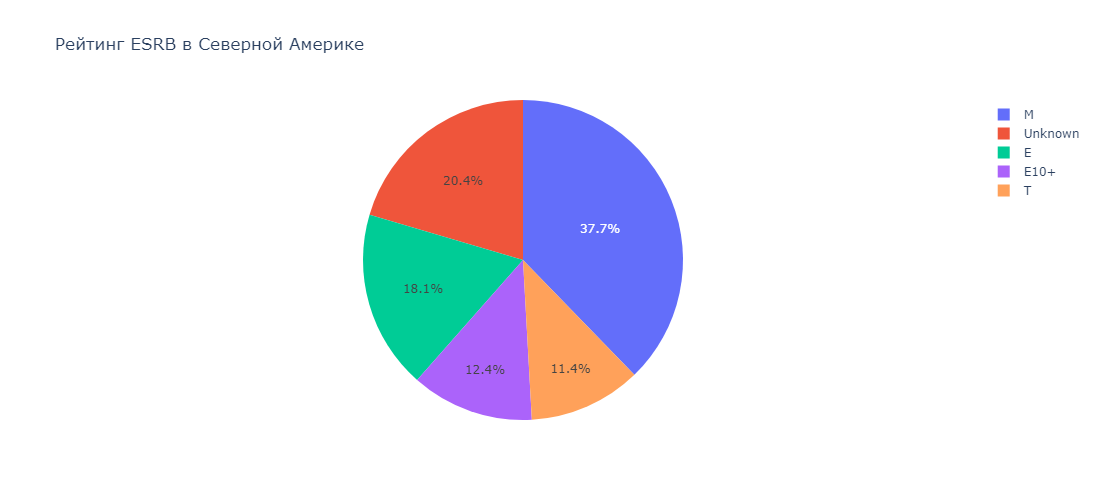

In [124]:
fig = px.pie(df_actual, 
             values='na_sales', 
             names='rating', 
             title='Рейтинг ESRB в Северной Америке',
             width=700, height=500)
fig.show()

*Рейтинг ESRB в Северной америке:*
+ «M» («От 17 лет») - 37,7%.
+ «Unknown» - 20,4%.
+ «E» («Для всех») - 18,1%.
+ «E10+» («Для всех старше 10 лет») - 12.4%.
+ «T» («Подросткам 13–19 лет») - 11.4%.

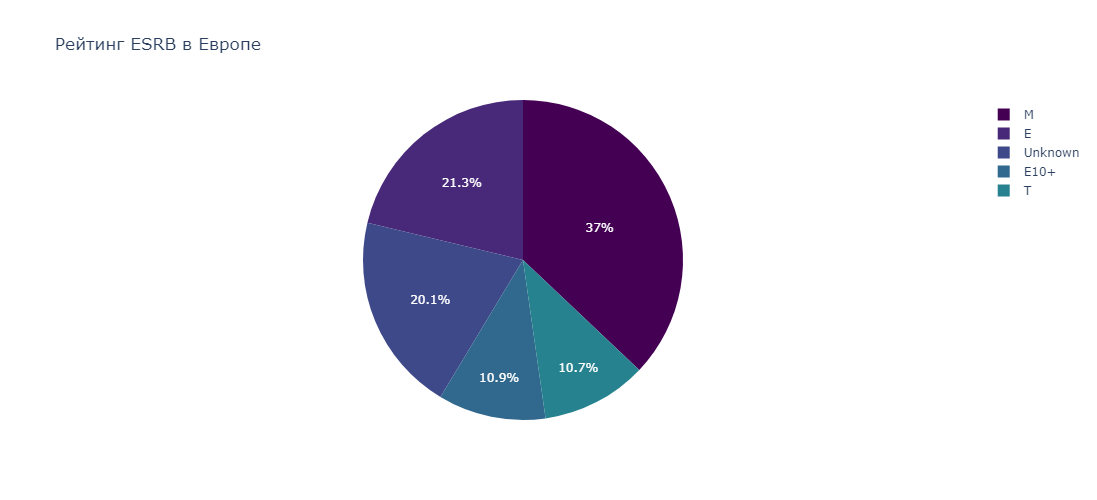

In [125]:
fig = px.pie(df_actual,
             values='eu_sales',
             names='rating',
             title='Рейтинг ESRB в Европе',
             color_discrete_sequence=px.colors.sequential.Viridis,
             width=700, height=500)
fig.show()

*Рейтинг ESRB в Европе:*
+ «M» («От 17 лет») - 37%.
+ «E» («Для всех») - 21,3%.
+ «Unknown» - 20.1%.
+ «E10+» («Для всех старше 10 лет») - 10.9%.
+ «T» («Подросткам 13–19 лет») - 10.7%.

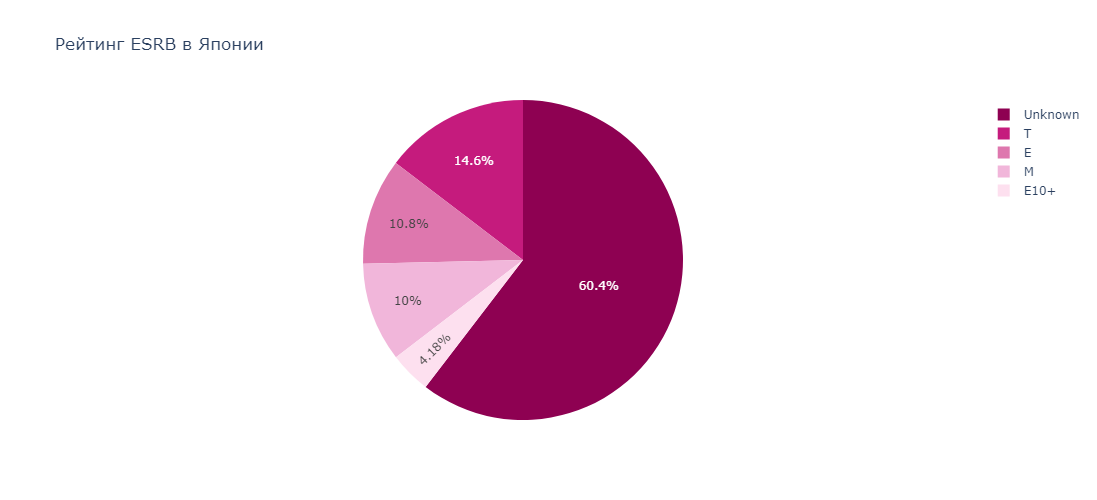

In [126]:
fig = px.pie(df_actual,
             values='jp_sales',
             names='rating',
             title='Рейтинг ESRB в Японии',
             color_discrete_sequence=px.colors.diverging.PiYG,
             width=700, height=500)
fig.show()

*Рейтинг ESRB в Японии:*
+ «Unknown» - 60.4%.
+ «T» («Подросткам 13–19 лет») - 14.6%.
+ «E» («Для всех») - 10.8%.
+ «M» («От 17 лет») - 10%.
+ «E10+» («Для всех старше 10 лет») - 4.18%.

<span style="color:purple">**Вывод:**</span> получили портрет пользователя для каждого региона:
1. По платформам топ-5:

+ Серевная Америка: 'PS4' (108.74), 'XOne' (93.12), 'X360' (81.66), 'PS3' (63.50), '3DS' (38.20).

+ Европа: 'PS4' (141.09), 'PS3' (67.81), 'XOne' (51.59), 'X360' (42.52), '3DS' (30.96).

+ Япония: '3DS' (67.81), 'PS3' (23.35), 'PSV' (18.59), 'PS4' (15.96), 'WiiU' (10.88).

В Серевной Америке и Европе вкусы похожи, в первую петерку попали одинаковые платформы. 'PS4' находится на первом месте, а на последнем '3DS', остальные в разнобой. Но в Северной Америке доля 'PS4' (28.2%), а Европе - 42.2%. С Японией предпочтения сильно отличаются, 'PS4' у них только на четвертом месте, а первое место занимает платформа '3DS' (ее доля в Японии достигает 49.6%)


2. По жанрам топ-5:
+ Серевная Америка: 'Action' (126.05), 'Shooter' (109.74), 'Sports' (65.27), 'Role-Playing' (46.40), 'Misc' (27.49).
+ Европа: 'Action' (118.13), 'Shooter' (87.86), 'Sports' (60.52), 'Role-Playing' (36.97), 'Racing' (20.19).
+ Япония: 'Role-Playing' (51.04), 'Action' (40.49), 'Misc' (9.20), 'Fighting' (7.65), 'Shooter' (6.61).

В Серевной Америке и Европе первые четыре жанра одинаковые. Доли жанров разбиты равномерно. А вот у Японии большую долю занимают всего два жанра - 'Role-Playing' и 'Action', их доля 44.4% и 35.2%.

3. В Серевной Америке и Европе больше всего продаж приходится на рейтинг «M» («От 17 лет») - ~37%. В Японии первое место занимают игры с неуказанным рейтингом «Unknown» - 60.4%, затем игры для всех «T» («Подросткам 13–19 лет») - 14.6%.

## 5. Проверка гипотез

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем гипотезу.
+ `Нулевая гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
+ `Альтернативная гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC разные.

Проведем точечную оценку параметров. Для этого посмотрим на среднее и дисперсию

In [127]:
#посмотрим описательную статистику пользовательского рейтинга по 'XOne'
df_actual_xone = df_actual[(df_actual['user_score'] > -1) & (df_actual['platform'] == 'XOne')]

In [128]:
df_actual_xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [129]:
#посмотрим описательную статистику пользовательского рейтинга по 'PC'
df_actual_pc = df_actual[(df_actual['user_score'] > -1) & (df_actual['platform'] == 'PC')]

In [130]:
df_actual_pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

+ `XOne` средняя равна 6.52, стандартное отклонение - 1.38.
+ `PC` средняя - 6.27, стандартное отклонение - 1.74.
Видно, что средние не сильно отличаются, а вот стандартное оклонение отличается, следовательно и дисперсия будет разной. У `PC` разброс данных вокруг среднего больше.

Общепринятым уровнем значимости выбирают 1% или 5%. В большинстве областей исследований, позволяющим сбалансировать риски ошибок первого и второго рода, выбирают 5%. И мы примем 5%. Проверяем двустороннюю гипотезу о равенстве двух совокупностей.

In [131]:
alpha = 0.05 # уровень статистической значимости

In [132]:
results = st.ttest_ind(
    df_actual_xone['user_score'], 
    df_actual_pc['user_score'], equal_var=True) #(equal_var=True), т.к. дисперсии не равны
results.pvalue

0.14012658403611647

In [133]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


*Полученное значение p-value 0.14, больше заданного уровня значимости 0.05, поэтому мы не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.*

**5.2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.**

Сформулируем гипотезу.
+ `Нулевая гипотеза`: средние пользовательские рейтинги жанров Action и Sports одинаковые.
+ `Альтернативная гипотеза`: средние пользовательские рейтинги жанров Action и Sports разные.

In [134]:
#посмотрим описательную статистику пользовательского рейтинга жанра 'Action'
df_actual_action = df_actual[(df_actual['user_score'] > -1) & (df_actual['genre'] == 'Action')]

In [135]:
df_actual_action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [136]:
#посмотрим описательную статистику пользовательского рейтинга жанра 'Sports'
df_actual_sports = df_actual[(df_actual['user_score'] > -1) & (df_actual['genre'] == 'Sports')]

In [137]:
df_actual_sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

+ `Action` средняя равна 6.84, стандартное отклонение - 1.33.
+ `Sports` средняя - 5.24, стандартное отклонение - 1.78.
Видно, что средние и стандартное оклонение разные.

Также выберем уровень значимости в 5%. Проверяем двустороннюю гипотезу о равенстве двух совокупностей.

In [138]:
results = st.ttest_ind(
    df_actual_action['user_score'], 
    df_actual_sports['user_score'], equal_var=True)
results.pvalue

1.0517832389140023e-27

In [139]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


*Полученное значение p-value 1.05e-27, меньше заданного уровня значимости 0.05, поэтому мы отвергаем нулевую гипотезу. Оставляем альтернативную гипотезу, средние пользовательские рейтинги жанров `Action` и `Sports` разные.*

<span style="color:purple">**Вывод:**</span> 
для проверки гипотез приняли уровень значимости 5%. Сформулировали гипотезу.
1. `Нулевая гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
`Альтернативная гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC разные.

Получили, что  средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые (p-value 0.14, больше заданного уровня значимости).

2. `Нулевая гипотеза`: средние пользовательские рейтинги жанров Action и Sports одинаковые.
+ `Альтернативная гипотеза`: средние пользовательские рейтинги жанров Action и Sports разные.

Получили, что средние пользовательские рейтинги жанров `Action` и `Sports` разные (p-value 1.05e-27, меньше заданного уровня значимости).

+ Как была сформулирована нулевая и альтернативная гипотеза:
1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сфольмулирована, как нулевуя гипотеза Н0, которая обычно равна. Поэтому за нулевую гипотезу принято: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Для альтернативной гипотезы Н1 выбирают из оставшихся вариантов: двусторонняя (не равен числу из Н0), правосторонняя (больше числа из Н0), левосторонняя (меньше числа из Н0). У нас формулировку звучит про равенство, значит за Н1 принимаем: средние пользовательские рейтинги платформ Xbox One и PC разные. Проверку проводим двустороннюю.
2. "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Т.к. Н0 всегда равна, то за нулевую гипотезу принято: средние пользовательские рейтинги жанров Action и Sports одинаковые. Также как и в первой задаче речь идет о равенстве, поэтому за альтернативную гипотезу принимаем: средние пользовательские рейтинги жанров Action и Sports разные. Проверку проводим двустороннюю.

+ Какой критерий применили.
По графикам мы видели, что у нас нормальное распределение. Количество исследуемых параметров больше 30, можем проверить гипотезу распределением Стьюдента (оно практически не будет отличаться от нормального распределения) или двухвыборочный t-тест для независимых выборок. Поэтому был выбран t-тест с указанием аргумента (equal_var=True), т.к. дисперсии у нас не равны.

P-value - это вероятность получить наблюдаемый результат, если нулевая гипотеза (H0) верна. Малое значение p-value указывает на малую вероятность того, что наблюдаемые данные соответствуют нулевой гипотезе. Уровень значимости задает порог, насколько маловероятным должно быть отклонение, чтоб мы могли считать результат значимым. Пороговый уровень выбирается исходя из поставленной задачи, мы приняли его равным 5% (если нужны более жесткие требования, то его необходимо уменьшить).

## 6. Общий вывод

В процессе анализа, для интернет-магазин "Стримчик", изучены данные с 1980 по 2016 год о продажах игр, оценки пользователей, экспертов, жанры и платформы. В файле `games.csv` 16715 строки и 11 параметров, в данных были пропуски.

Выполнели предобработка данных:
+ Названия столбцов привели к нижнему регистру;
+ Преобразовали данные, в соответствии со значениями в столбцах, к нужным типам. `year_of_release`-'int', `critic_score`-'int', `user_score`-'float'.
+ Удалили пропуски в столбцах `name` и `year_of_release`, где количество пропусков не превышало 1.61% от всех данных.
+ Заменили пропуски в столбце `critic_score` значением отличным от всех в этом столбце -1 (количество пропусков 51.45%).
+ Заменили пропуски в столбце `user_score` значением отличным от всех в этом столбце -1 (количество пропусков 40.17%). В столбце была аббревиатура 'tbd' (в задании не описано, что это). Обычно аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined". Заменили эти значения на -2.
+ Заменили пропуски в столбце `rating` (количество пропусков 40.6%) значением "Unknown" (т.к. тип столбца 'object').
+ Удалили неяный дубликат (1 строка). Явных дубликатов не обнаружено.
+ Создали столбец `total` с суммарными продажами во всех регионах.

В результате предобработки данных получили 16443 строк и 12 столбцов. Пропуски могли появится из-за выгрузки данных из разных источников, например, в одном источнике в одном из источников не было рейтинга критиков или пользователей.

Провели исследовательский анализ, в результате чего мы получили:
1. С 1993 года выпуск игр начинает расти. Максимум достигается в 2008 году. Далее начинается спад. С 2012 года наблюдается стабильность в выпуске игр. Для интеренет-магазина "Стримчик" нужны данные о продажах игр только за 5-7 лет, т.к.приставки и игры постоянно улучшаются (обновляются), например, графика становится лучше. Поэтому пользователи стремятся покупать более новые версии.
2. Обнаружили аномаль в строке с игрой 1985 года "Strongest Tokyo University Shogi DS". Эта игра встречается на DS, а DS появилось намного позже и по игре практически не было продаж. Поэтому удалили эту строку.
3. Выбрали для дальнейшего анализа актуальный период с 2012 по 2016 года (учли, что нужны актуальные данные о продаже и выход в 2013 году популярной платформы PS4) .
5. Определили лидиров по продажам с 2012 по 2016 года:
+ PS4 их общие продажи составили 314.14 млн проданных копий, что составило 28,8% от суммы всех продаж платформ;
+ PS3 - 181.43 млн проданных копий, что составило 16,6%;
+ XOne - 159.32 млн проданных копий, что составило 14,6%,
+ 3DS - 143.25 млн проданных копий, что составило 13,1%,
+ X360 - 136.8 млн проданных копий, что составило 12,5%
5. Увидели, что каждая платформа имеет выбросы значений, разные межквартальные размахи. Общее медианное значение 0.487957 отличалось от медианных значений платформ. Минимальное значение продаж равно 0.01, а максимальное 21.05.
6. У платформы 'PS4' оценка критиков влияет на продажи, но не сильно, т.к. корреляция равна ~0.41. Оценка пользователей не влияет на продажи.
7. У остальных платформ также оценка критиков влияет на продажи, но не сильно, т.к. корреляция равна от ~0.33 до 0.42. Оценка пользователей не влияет на продажи. Коэффициент корреляции между оценками пользователей и продажами от ~ -0.07 до 0.24.
8. Вывели самые популярные (прибыльные жанры):
+ Action (322.5 млн проданных копий, экшен-игры)
+ Shooter(232.98, это поджанр Action сражение с использованием оружия)
+ Sports(150.65)
+ Role-Playing(145.89).
На первом и втором месте пользуются популярностью игры, акцент которых делается на скорость реакции игрока и зрительно-моторную координацию. На третьем и четвертом месте игры, где может играть более двух человек. 
С низкими продажами Puzzle (3.17) и Strategy(10.08). Игры, целью которых является решение логических задач и головоломок.

Проведя дополнительное исследование мы увидели, что предпочтение в жанрах надо отдавать стабильным жанрам Shooter и Sports, которые дают устойчивый спрос (у них больше медианное значением прибыли).

Составили портрет пользователя для каждого региона и получили:
1. Топ-5 платформ:
+ Серевная Америка: 'PS4' (108.74), 'XOne' (93.12), 'X360' (81.66), 'PS3' (63.50), '3DS' (38.20).
+ Европа: 'PS4' (141.09), 'PS3' (67.81), 'XOne' (51.59), 'X360' (42.52), '3DS' (30.96).
+ Япония: '3DS' (67.81), 'PS3' (23.35), 'PSV' (18.59), 'PS4' (15.96), 'WiiU' (10.88).

В Серевной Америке и Европе вкусы похожи, в первую петерку попали одинаковые платформы. 'PS4' находится на первом месте, а на последнем '3DS', остальные в разнобой. Но в Северной Америке доля 'PS4' (28.2%), а Европе - 42.2%. С Японией предпочтения сильно отличаются, 'PS4' у них только на четвертом месте, а первое место занимает платформа '3DS' (ее доля в Японии достигает 49.6%)

2. Топ-5 жанров игр:
+ Серевная Америка: 'Action' (126.05), 'Shooter' (109.74), 'Sports' (65.27), 'Role-Playing' (46.40), 'Misc' (27.49).
+ Европа: 'Action' (118.13), 'Shooter' (87.86), 'Sports' (60.52), 'Role-Playing' (36.97), 'Racing' (20.19). 
+ Япония: 'Role-Playing' (51.04), 'Action' (40.49), 'Misc' (9.20), 'Fighting' (7.65), 'Shooter' (6.61).

В Серевной Америке и Европе первые четыре жанра одинаковые. Доли жанров разбиты равномерно. А вот у Японии большую долю занимают всего два жанра - 'Role-Playing' и 'Action', их доля 44.4% и 35.2%.

3. Как рейтинг ESRB влияет на продажи (рейтинг ESRB только для маркировки игр для США и Канады). В Серевной Америке и Европе больше всего продаж приходится на рейтинг «M» («От 17 лет») ~37%. В Японии первое место занимают игры с неуказанным рейтингом «Unknown» - 60.4%, затем игры для всех «T» («Подросткам 13–19 лет») - 14.6%.

Проверили гипотезы.

Для проверки приняли уровень значимости 5% и сформулировали нулевую и альтернативную гипотезу:
1. Для проверки первой гипотезы. `Нулевая гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
`Альтернативная гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC разные.

Получили, что  средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые (p-value 0.14, больше заданного уровня значимости).

2. Для проверки второй гипотезы. `Нулевая гипотеза`: средние пользовательские рейтинги жанров Action и Sports одинаковые. `Альтернативная гипотеза`: средние пользовательские рейтинги жанров Action и Sports разные.

Получили, что средние пользовательские рейтинги жанров `Action` и `Sports` разные (p-value 1.05e-27, меньше заданного уровня значимости).

+ Как была сформулирована нулевая и альтернативная гипотеза:
1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сфольмулирована, как нулевуя гипотеза Н0, которая обычно равна. Поэтому за нулевую гипотезу принято: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Для альтернативной гипотезы Н1 выбирают из оставшихся вариантов: двусторонняя (не равен числу из Н0), правосторонняя (больше числа из Н0), левосторонняя (меньше числа из Н0). У нас формулировку звучит про равенство, значит за Н1 принимаем: средние пользовательские рейтинги платформ Xbox One и PC разные. Проверку проводим двустороннюю.
2. "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Т.к. Н0 всегда равна, то за нулевую гипотезу принято: средние пользовательские рейтинги жанров Action и Sports одинаковые. Также как и в первой задаче речь идет о равенстве, поэтому за альтернативную гипотезу принимаем: средние пользовательские рейтинги жанров Action и Sports разные. Проверку проводим двустороннюю.

+ Какой критерий применили.
По графикам мы видели, что у нас нормальное распределение. Количество исследуемых параметров больше 30, можем проверить гипотезу распределением Стьюдента (оно практически не будет отличаться от нормального распределения) или двухвыборочный t-тест для независимых выборок. Поэтому был выбран t-тест с указанием аргумента (equal_var=True), т.к. дисперсии у нас не равны.

P-value - это вероятность получить наблюдаемый результат, если нулевая гипотеза (H0) верна. Малое значение p-value указывает на малую вероятность того, что наблюдаемые данные соответствуют нулевой гипотезе. Уровень значимости задает порог, насколько маловероятным должно быть отклонение, чтоб мы могли считать результат значимым. Пороговый уровень выбирается исходя из поставленной задачи, мы приняли его равным 5% (если нужны более жесткие требования, то его необходимо уменьшить).

Из проделанного исследования можно сказать, что рекламный бюджет интернета магазина "Стримчик" необходимо потратить на платформу PS4, жанры Shooter и Sports. С рейтингом "M" (для взрослых), если мы хотим рекламировать в США, Канаде и Европе (рейтинг ESRB только для маркировки игр для США и Канады). В Японии свой ретинг (в исходных данных его нет). Можно обращать внимание на отзывы критиков, но они практически не влияют на продажи, а вот на отзывы покупателей не стоит обращать внимание.